# Historic Value at Risk for banks in Argentina

### Importar librerias

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from utils import *



```mermaid
    graph TD;
    Portfolio-->Historic_returns
    Assets_prices-- Window-->Historic_returns
    Historic_returns-- Volatility_definitions--> Historic_EWMA_volatility
    Historic_returns-- Volatility_definitions --> Historic_MM_volatility
    Historic_MM_volatility-- VaR_definitions -->Historic_VaR_MM
    Historic_EWMA_volatility-- VaR_definitions -->Historic_VaR_EWMA
```



### Qué cartera tenemos? 

In [3]:
# Portfolio
tickers = ['BMA','BBAR','SUPV','GGAL']
weights = [0.25 ,0.25  ,0.25  ,0.25  ]

# Window
end_date = "2023-05-13"
start_date = "2022-05-13" 

# Volatility definitions
ventana_dias_volatilidad = 50
Lambda = 0.94

#VaR definitios
alpha=0.05
Z_value = stats.norm.ppf(abs(alpha))
VaR_days = 10


### Consulta a Yahoo Finance y devuelve retornos logarítmicos

In [4]:
''' df_completo = yf.download(tickers,start=start_date, 
                    end=end_date,
                    progress=True)

df_prices = df_completo['Adj Close'].sort_index(ascending= False)
df_prices.to_csv('prices.csv')
 '''

df_prices = pd.read_csv('prices.csv')
df_prices.Date = pd.to_datetime(df_prices.Date)
df_prices =  df_prices.set_index('Date')


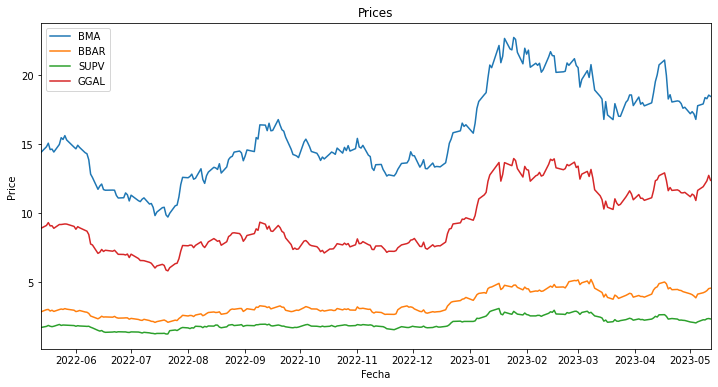

In [5]:
plot_series(df_prices, 'Prices', 'Price')

### Genero df de retornos logaritmicos

In [6]:
df_Returns = pd.DataFrame()
for i in df_prices.columns:
    
    df_Returns[i] = np.diff(np.log(df_prices[i]))
    df_Returns['Date'] = df_prices.index[0:-1] 
    df_Returns = df_Returns.set_index('Date')

### Cálculo de volatilidad histórica para un activo

In [7]:
volatility_BMA = generate_stock_volatility(df_Returns,'BMA', Lambda=Lambda ,Days = ventana_dias_volatilidad)

In [8]:
volatility_BMA

,return,variance_EWMA,desv_EWMA,variance_MM,desv_MM
Date,,,,,
2023-05-12,0.004858,0.223840,0.473117,0.323596,0.568855
2023-05-11,-0.014100,0.234974,0.484741,0.348497,0.590337
2023-05-10,0.004360,0.250065,0.500065,0.347277,0.589302
2023-05-09,-0.025332,0.256087,0.506050,0.349468,0.591158
2023-05-08,-0.007277,0.271629,0.521181,0.348791,0.590585
...,...,...,...,...,...
2022-08-04,0.029210,0.291127,0.539562,0.261614,0.511482
2022-08-03,-0.012963,0.307164,0.554224,0.266429,0.516168
2022-08-02,-0.007704,0.325821,0.570807,0.265928,0.515682


### Grafico comparativo entre las 2 formas de calcular la volatilidad

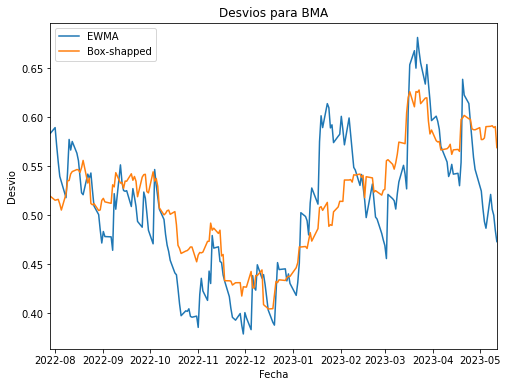

In [9]:
plot_volatility(volatility_BMA, 'BMA')

In [10]:
df_desv_EWMA = generate_multi_volatility_EWMA(df_Returns)

In [11]:
df_desv_MM = generate_multi_volatility_MM(df_Returns)

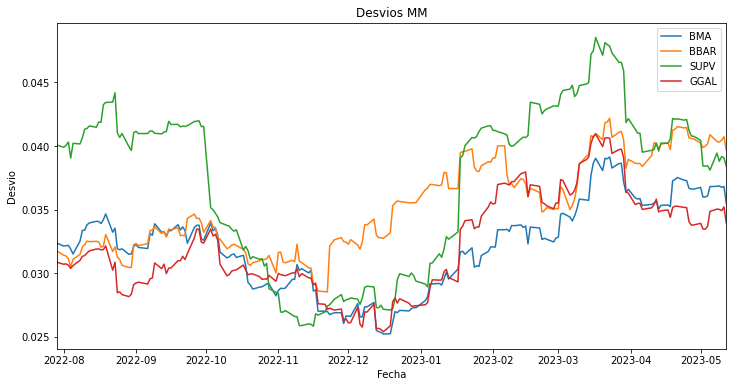

In [12]:
plot_series(df_desv_MM, 'Desvios MM', 'Desvio')



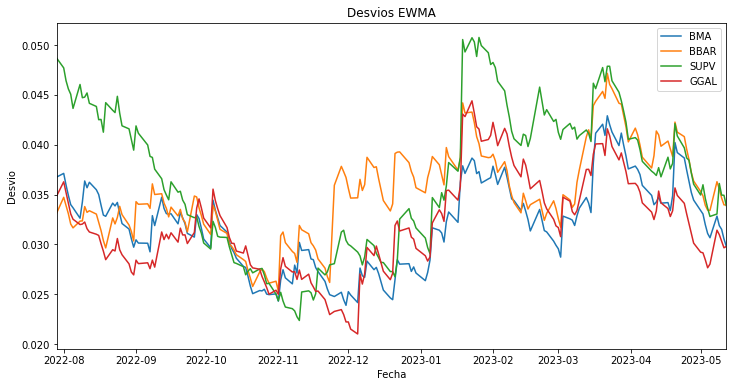

In [73]:
plot_series(df_desv_EWMA, 'Desvios EWMA', 'Desvio')

# VaR

### VaR individual histórico


In [481]:
hist_ind_VaR_EWMA = df_prices[0:199] * (df_desv_EWMA) * Z_value * np.sqrt(VaR_days)
hist_ind_VaR_EWMA

,BBAR,BMA,GGAL,SUPV
Date,,,,
2023-05-12,-0.806753,-2.864824,-1.919735,-0.412507
2023-05-11,-0.802105,-2.949501,-1.966529,-0.430514
2023-05-10,-0.791013,-3.000139,-1.947425,-0.427110
2023-05-09,-0.795472,-3.049313,-1.955819,-0.426335
2023-05-08,-0.800292,-3.061933,-1.949747,-0.391891
...,...,...,...,...
2022-08-04,-0.419249,-2.204864,-1.291004,-0.393861
2022-08-03,-0.444451,-2.331911,-1.363609,-0.403237
2022-08-02,-0.457481,-2.370753,-1.406765,-0.396047


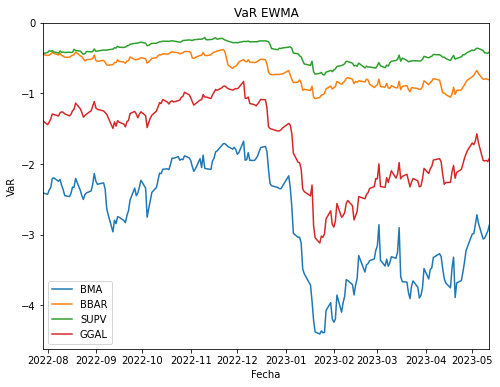

In [483]:
plot_series(hist_ind_VaR_EWMA, 'VaR EWMA', 'VaR')

In [484]:
hist_ind_VaR_MM = df_prices[0:199] * (df_desv_MM) * Z_value * np.sqrt(VaR_days)
hist_ind_VaR_MM

,BBAR,BMA,GGAL,SUPV
Date,,,,
2023-05-12,-0.942696,-3.409917,-2.186995,-0.467343
2023-05-11,-0.961817,-3.555918,-2.334978,-0.481512
2023-05-10,-0.923760,-3.499988,-2.243001,-0.478794
2023-05-09,-0.901634,-3.526352,-2.211311,-0.458044
2023-05-08,-0.889826,-3.434810,-2.174305,-0.467748
...,...,...,...,...
2022-08-04,-0.399323,-2.069113,-1.186412,-0.341209
2022-08-03,-0.418126,-2.149960,-1.224298,-0.356429
2022-08-02,-0.422930,-2.120273,-1.229845,-0.341582


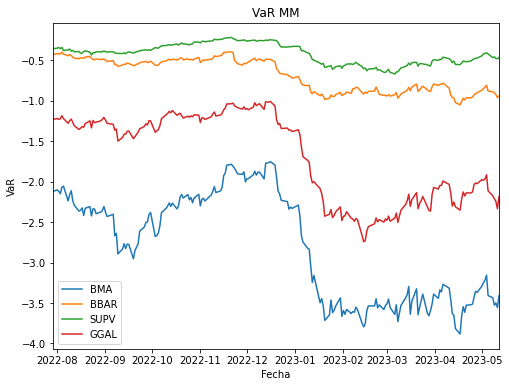

In [485]:
plot_series(hist_ind_VaR_MM, 'VaR MM', 'VaR')

### Chequeo distribuciones

In [514]:
import matplotlib.pyplot as plt
import scipy.stats as stats
# Repeat for each equity in portfolio


def check_distribution (Returns,ticker):
    mu = np.mean(Returns[ticker])
    sigma =  np.std(Returns[ticker])
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

    Returns[ticker].hist(bins=40,alpha=0.8 , density=True)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    
    plt.title(f'{ticker} returns (binned) vs. normal distribution')
    plt.show()

    kstest_result = stats.kstest(Returns[ticker], 'norm', args=(mu, sigma))
    print(f'{ticker} - Kolmogorov-Smirnov test p-value: {kstest_result.pvalue}')


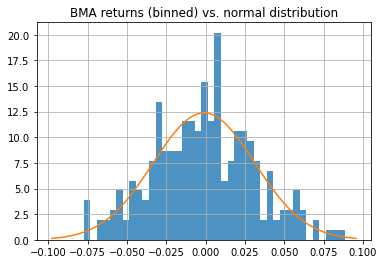

BMA - Kolmogorov-Smirnov test p-value: 0.9469589812812824


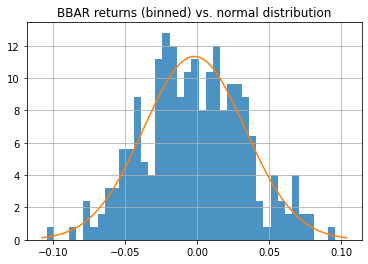

BBAR - Kolmogorov-Smirnov test p-value: 0.7941153365842565


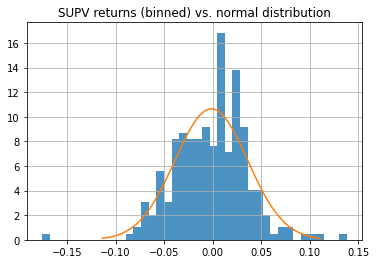

SUPV - Kolmogorov-Smirnov test p-value: 0.3746459436988745


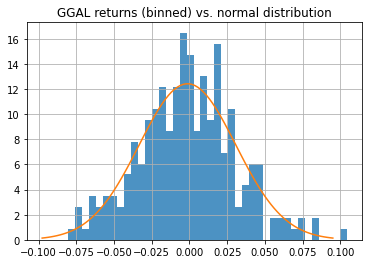

GGAL - Kolmogorov-Smirnov test p-value: 0.9353573478687183


In [515]:
for i in tickers:
    check_distribution(df_Returns,i)

### VaR portafolio

In [513]:
port_value = df_prices.iloc[0, : ].dot(weights)

print('Last day portfolio Value:', round(port_value,2), 'ars')

Last day portfolio Value 9.44 ars


In [347]:
df_prices_port = df_prices
df_prices_port['portafolio'] = df_prices.dot(weights)

#### Calculo de covarianzas

In [381]:
df_Returns.iloc[0:0+50].cov()

,BBAR,BMA,GGAL,SUPV
BBAR,0.001605,0.001332,0.001283,0.001327
BMA,0.001332,0.001284,0.001156,0.001160
GGAL,0.001283,0.001156,0.001175,0.001150
SUPV,0.001327,0.001160,0.001150,0.001504


In [358]:
Returns= df_Returns
COV=[]
for i in range(len(Returns)-ventana_dias_volatilidad):
        COV.append(Returns.iloc[i:i+50, ].cov()
                    )
        

In [413]:
def generate_multi_COV(Returns, Days=ventana_dias_volatilidad):
    
    COV = []
    
    # itero sobre cada columna
    for i in range(len(Returns)-Days):

        COV.append(Returns.iloc[i:i+50, ].cov())
    
    COV= np.array(COV)
    return  COV

COV_hist = generate_multi_COV(df_Returns)

In [432]:
COV_hist[1].diagonal().dot( df_prices.iloc[1, : ])

0.053183452223910785

In [437]:
range(len(df_Returns)-VaR_days)

range(0, 240)

In [466]:
def Var_hist(Prices ,VaR_days=VaR_days,Weights=weights, Days=ventana_dias_volatilidad, Z_value = Z_value):
    
    Var_hist= []

    # itero sobre cada columna
    for i in range(len(Prices)-ventana_dias_volatilidad-1):

        Var_hist.append( Z_value * 
                        np.sqrt(VaR_days/252) * 
                        (np.sqrt(COV_hist[i].diagonal()).dot( Prices.iloc[i, : ] * Weights)) *
                        np.sqrt(252)
                        )
                                   
        
    return  Var_hist

Var_hist = Var_hist(df_prices)

In [467]:
Z_value

-1.6448536269514729

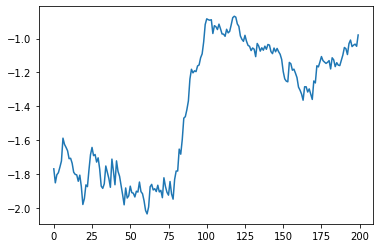

In [469]:
plt.plot(Var_hist)

In [455]:
np.sqrt(COV_hist[0].diagonal()) .dot( df_prices.iloc[0, : ])

1.3607828682400835

In [452]:
np.sqrt(Returns.iloc[0:0+50, ].var())

BBAR    0.040060
BMA     0.035835
GGAL    0.034280
SUPV    0.038786
dtype: float64

In [310]:
df_prices[0:199].shape

(199, 4)

In [158]:
share_prices.dot(weights)

Date
2023-05-10    9.35
dtype: float64

In [131]:
# Generate Var-Cov matrix
cov_matrix = df_Returns.cov()
cov_matrix

,BBAR,BMA,GGAL,SUPV
BBAR,0.001242,0.000990,0.000988,0.000928
BMA,0.000990,0.001043,0.000963,0.000833
GGAL,0.000988,0.000963,0.001035,0.000868
SUPV,0.000928,0.000833,0.000868,0.001410
